<div class="alert alert-block alert-info">
    <h1>Mathematics for Robotics and Control - SS24</h1>
    <h3>General Information:</h3>
    <p>Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you <b>should not change the name, arguments or return value</b> of the function.</p>
    <p>If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.</p>
    <p>When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via <i>Kernel -> Restart & Run All</i>).</p>
    <p>Code cells where you are supposed to give your answer often include the line  <code>raise NotImplementedError</code>. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.</p>
    <h3>Submission:</h3>
    <p>Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are due on <b>Sunday</b> at <b> 20:00 </b> CEST.</p>
    <h3>Group Work:</h3>
    <p>Group work is allowed! If you are working in a group, please write your student IDs (ending with -2s) in the designated cell below.</p>
    <h3>Questions about the Assignment:</h3>
    <p>If you have questions about the assignment please post them in the LEA forum before the deadline.</p>
    
</div>

In [ ]:
# Please fill in the usernames of all your team members

member1 = 'aarora2s'
member2 = 'kali2s'

# Task 1

**[20 Point(s)]**

## Warmup Exercise

As a warmup exercise, implement the following functions, which return:

* The rotation matrices $R_X$, $R_Y$ and $R_Z$ along $X$, $Y$ and $Z$ respectively.
* A homogeneous transformation matrix $T$, given Euler rotation angles and a translation vector.


## Task 1.1

**[5 Point(s)]**

In the subsequent exercise, please use the functions you implemented.

In [1]:
from typing import Sequence
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize, getfigs

def get_RX(theta: float) -> np.ndarray:
    '''Returns a matrix of a frame rotated about X.

    Keyword arguments:
    theta: float -- rotation angle in radians

    '''
    RX = np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])
    return RX

def get_RY(theta: float) -> np.ndarray:
    '''Returns a matrix of a frame rotated about Y.

    Keyword arguments:
    theta: float -- rotation angle in radians

    '''
    RY = np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])
    return RY

def get_RZ(theta: float) -> np.ndarray:
    '''Returns a matrix of a frame rotated about Z.

    Keyword arguments:
    theta: float -- rotation angle in radians

    '''
    RZ = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    return RZ
    
def get_homogeneous_transform(rotation_angles: Sequence[float],
                              translation: Sequence[float]) -> np.ndarray:
    '''Returns a homogenous transformation matrix describing
    the pose of one frame relative to another frame.

    Keyword arguments:
    rotation_angles: Sequence[float] -- rotation angles (in degrees) in the order [z, y, x]
    translation: Sequence[float] -- translation (in meters) in the order [x, y, z]

    '''
    rz, ry, rx = np.radians(rotation_angles)
    RZ = get_RZ(rz)
    RY = get_RY(ry)
    RX = get_RX(rx)
    
    R = RZ @ RY @ RX
    
    T = np.eye(4)
    T[:3, :3] = R
    T[:3, 3] = translation
    
    return T

In [110]:
# This cell contains automated tests for your solution


## Task 1.2

**[15 Point(s)]**

## Lucy, Hand Over the Bottle! 

Assume that Lucy has to hand over a water bottle to Ahmed (a senior MAS student). Lucy uses a gesture recognition module for finding the pose of Ahmed's hand $\{H\}$ relative to the camera frame $\{C \}$. The module reports that, relative to frame $\{C\}$, Ahmed's hand is located at $(-0.1,$ $0.2,$ $1.3)$ meters in $X, Y$ and $Z$, respectively, and is rotated by $90.0^o$ about $Z$, $72.85^o$ about $Y$, and $180.0^o$ about $X$. This information corresponds to the transform ${}^C_HT$.

The pose of the camera relative to the robot's base, denoted by ${}^B_CT$, is located $(0.02,$ $0.0,$ $1.2)$ meters away from the base frame and is rotated $-90.0^o$ about $Z$ and $-107.15^o$ about $X$. Furthermore, using the robot's kinematics, we can calculate ${}^B_GT$, the transform describing the frame of the manipulator's end-effector $\{G\}$ relative to the base frame $\{B\}$; this is given by a translation of $(0.7,$ $0.078,$ $0.7)$ meters in $X, Y$, and $Z$ respectively and a rotation of $-180.0^o$ about $Z$ and $-90.0^o$ about $Y$.

For handing over the bottle, the robot needs to know the position and orientation of Ahmed's hand with respect to its end-effector. Your task is to calculate the pose of Ahmed's hand relative to the manipulator's end-effector, namely compute ${}^G_HT$. The following figure shows a description of the frames involved.

![Lucy Handover](Assignment_06_Frames_files/img/lucy_handover.png) 

Calculate ${}^G_HT$ by completing the following cell. [Please keep the variable names as it is]

In [111]:
# Please assign the transformation of Ahmed's hand with respect to 
# Lucy's gripper to T_of_H_relative_G
T_of_H_relative_G = None

# Given transformations:
# Transform from base to camera frame
T_B_C = get_homogeneous_transform(rotation_angles=[-90.0, 0.0, -107.15], translation=[0.02, 0.0, 1.2])

# Transform from camera to hand frame
T_C_H = get_homogeneous_transform(rotation_angles=[90.0, 72.85, 180.0], translation=[-0.1, 0.2, 1.3])

# Transform from base to gripper frame
T_B_G = get_homogeneous_transform(rotation_angles=[-180.0, -90.0, 0.0], translation=[0.7, 0.078, 0.7])

# Compute the transformation from gripper to hand frame
T_G_H = np.linalg.inv(T_B_G) @ T_B_C @ T_C_H

# Assign the result
T_of_H_relative_G = T_G_H

print("Transformation of H with respect to G")
print(T_of_H_relative_G)

Transformation of H with respect to G
[[-1.20809252e-16 -6.39549715e-17  1.00000000e+00 -7.44438004e-02]
 [-4.31764966e-17  1.00000000e+00  6.39549715e-17 -2.20000000e-02]
 [-1.00000000e+00 -4.31764966e-17 -1.29036487e-16  5.03222008e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [112]:
# This cell contains automated tests for your solution


# Task 2

**[20 Point(s)]**

## Autonomous Driving

In this task, we will combine and visualize the data from a Velodyne LiDAR and an RGB camera of an autonomous car. The LiDAR $\{L \}$ is translated by $(-0.3,$ $0.0,$ $0.87)$ meters in $X, Y$ and $Z$, respectively, from the base of the car $\{B \}$. Relative to this base frame, we also have the camera $\{C \}$ at $(-0.027,$ $0.0,$ $0.8)$ meters in $X, Y$ and $Z$, respectively, and rotated by $-89.5^o$ about $Z$ and $-89^o$ about $X$.
![Driveless](Assignment_06_Frames_files/img/driveless_car.png)

The LiDAR generates point cloud data which contains the $X$, $Y$ and $Z$ values of the environment in front of the car. The camera captures the image of the same environment. Your task is to visualize the LiDAR data as a 2D image.

The transformation of 3D points to a 2D image requires the information of the camera's intrinsic parameter. The calculation of this transformation is shown in the figure below. The intrinsic parameter are as follows:
- Focal length $(f_x$, $f_y)$ = $(721.54$, $721.54)$
- Camera center $(c_x$, $c_y)$ = $(609.56$, $172.85)$



After conversion to the image plane, the transformed points must be in homogeneous form, which can be obtained by dividing every vector by its last coordinate value; this would result in 2D vectors of the form $[x, y, 1]^T$.

![Transformations](Assignment_06_Frames_files/img/Vel2Cam.png) 

In [2]:
from typing import Sequence
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

point_cloud = np.loadtxt("Assignment_06_Frames_files/data/point_cloud.txt")

# Please assign the transformation of the LiDAR relative to the camera to T_L_C
T_of_L_relative_C = None

# Please assign the point cloud relative to the camera to cam_points,
# where the shape of 'cam_points' is (3, 37074)
cam_points = None

# YOUR CODE HERE

T_C_B = get_homogeneous_transform([-89.5, 0, -89],[-0.027, 0.0, 0.8])
T_L_B = get_homogeneous_transform([0,0,0],[-0.3,0.0,0.87])
T_L_C = np.linalg.inv(T_C_B).dot(T_L_B)

fx, fy = 721.54, 721.54
cx, cy = 609.56, 172.85
K = np.array([
    [fx, 0, cx],
    [0, fy, cy],
    [0, 0, 1]
])

identity = np.array([[1, 0, 0, 0],
                    [0, 1, 0, 0],
                    [0, 0, 1, 0]])

homogeneous_points = np.vstack((point_cloud.T, np.array([1]*point_cloud.T.shape[1])))

# Transform the points from LiDAR to Camera frame
cam_points_homogeneous = K.dot(identity).dot(T_L_C).dot(homogeneous_points)

# Convert back to 3D (divide by the homogeneous coordinate 'w')
cam_points = cam_points_homogeneous/ cam_points_homogeneous[2:,]

print(cam_points)
#raise NotImplementedError()

[[615.55522171 613.2840042  610.9960138  ... 478.60878136 476.32535803
  474.0983068 ]
 [156.75896071 156.7941928  156.93983304 ...   2.03770112   1.93219069
    1.83136333]
 [  1.           1.           1.         ...   1.           1.
    1.        ]]


In [114]:
# This cell contains automated tests for your solution


Verify your results by running the cell below. Your plot should look as shown below.
![Heat_map](Assignment_06_Frames_files/img/heat_map.png) 

<IPython.core.display.Javascript object>


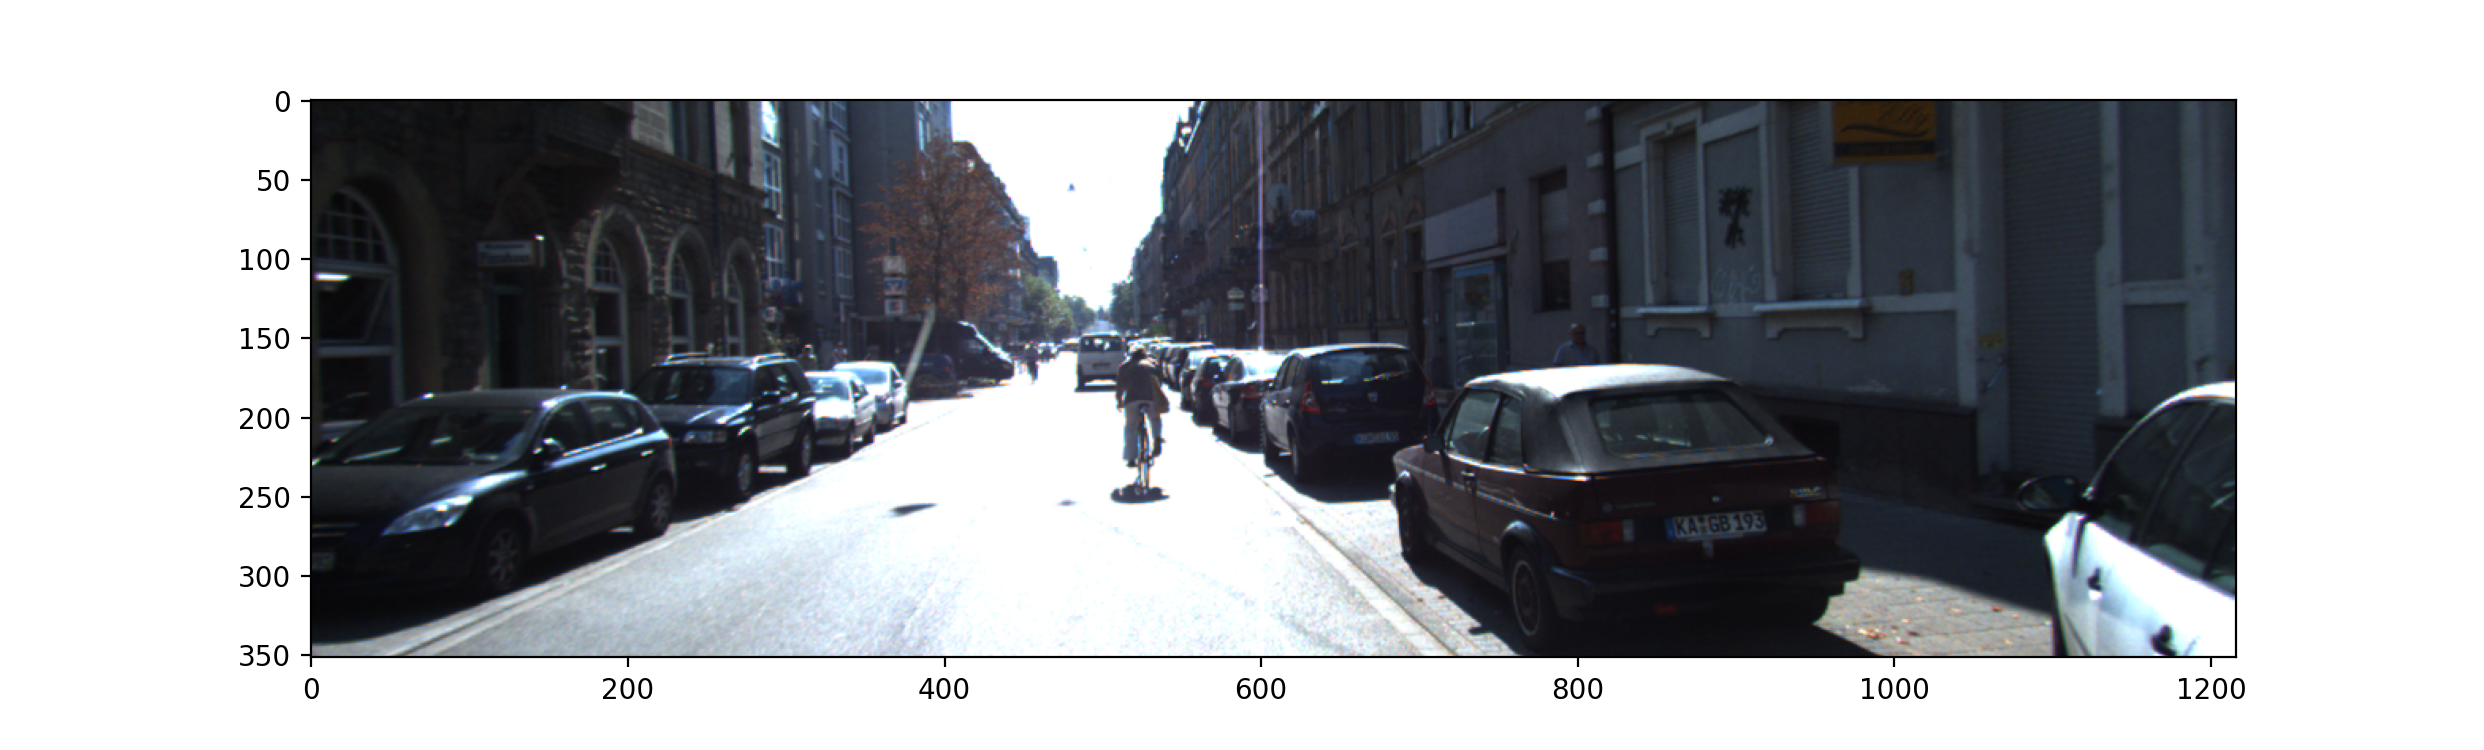

<IPython.core.display.Javascript object>


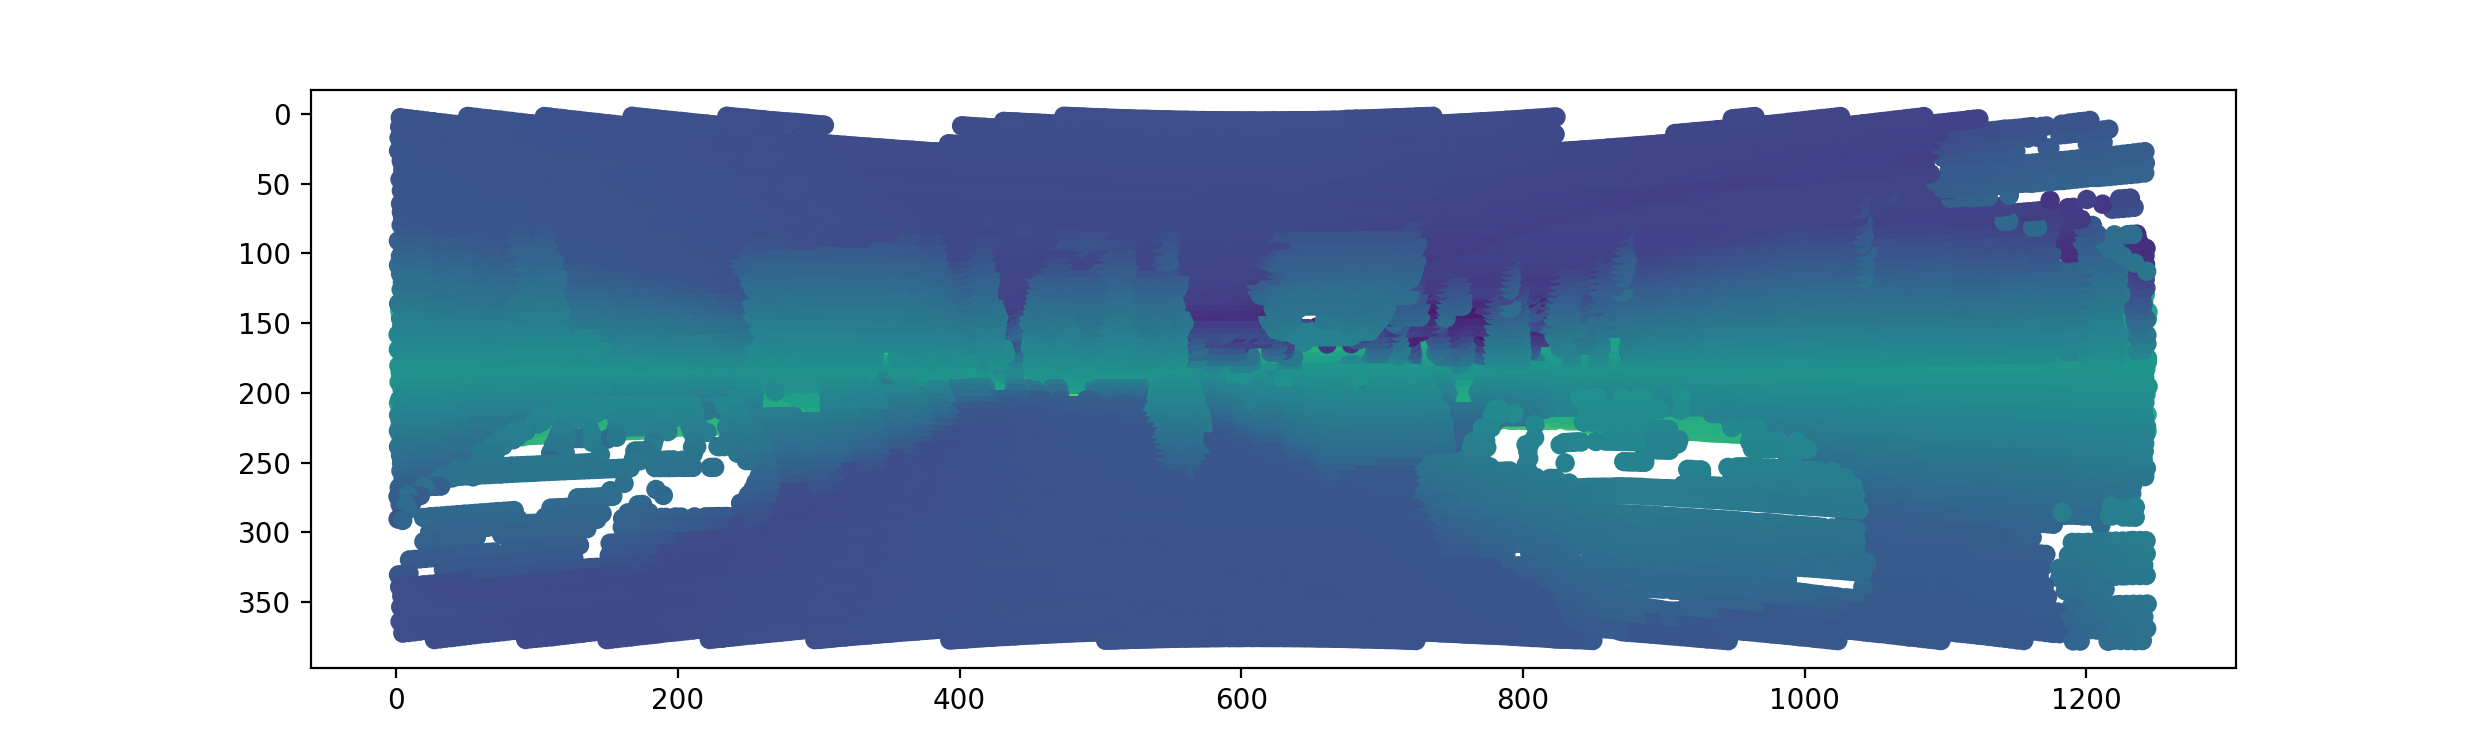

In [115]:
# Visualizing your solution
img = plt.imread("Assignment_06_Frames_files/img/RBG_image.png")
plt.figure(figsize=(12.42,3.75))
plt.imshow(img)
plt.figure(figsize=(12.42,3.75))
plt.gca().invert_yaxis()
plt.scatter(cam_points[0], cam_points[1], c = point_cloud[:,2])
plt.show()

# Task 3

**[30 Point(s)]**

## Rocket Science

It's the year 2069 and you have been chosen by NASA for the 'Alpha Centauri Mission'. The mission objective is to send a probe to the nearest star system 'Alpha Centauri'. The probe needs to maintain its orientation towards the star system at all times. The probe tracks three stars namely 'Alpha Centauri A', 'Sirius' and 'Denebola' (which are conveniently perpendicular to each other with respect to the probe) to correct its trajectory. The probe has multiple cameras placed strategically around the spacecraft to track these stars.

Unfortunately, an asteroid causes the probe to dislodge from its path by offsetting its orientation. To recover from the situation, three cameras are used to track the three stars separately. The ground station receives the data from the probe as follows,
- Camera#1 observes 'Alpha Centauri A' with respect to its frame $\{C_1\}$ at angles $29.87^o$ from its $X$ cooridinate, $66.34^o$ from its $Y$ coordinate and $72.84^o$ from its $Z$ coordinate. 'Alpha Centauri A' is about $4.4$ light years away from the probe.
- Camera#2 observes 'Sirius' with respect to its frame $\{C_2\}$ at angles $19.02^o$ from its $X$ cooridinate, $89.95^o$ from its $Y$ coordinate and $109.02^o$ from its $Z$ coordinate. 'Sirius' is about $8.6$ light years away from the probe.
- Camera#3 observes 'Denebola' with respect to its frame $\{C_3\}$ at angles $23.32^o$ from its $X$ cooridinate, $95.77^o$ from its $Y$ coordinate and $67.49^o$ from its $Z$ coordinate of the frame $\{C_3\}$. 'Denebola' is about $36$ light years away from the probe.

We also know the following information,
- Camera#1 is rotated by $-20^o$ about $Z$, $10^o$ about $Y$ and $-175^o$ about $X$ with respect to the center of the probe.
- Camera#2 is rotated by $50^o$ about $Z$, $12^o$ about $Y$ and $-155^o$ about $X$ with respect to the center of the probe.
- Camera#3 is rotated by $-3^o$ about $Z$, $-70^o$ about $Y$ and $70^o$ about $X$ with respect to the center of the probe.

Since we are observing the stars which are light years away, the translation of the cameras from the center of the probe can be ignored.<br>

Your task is to calculate the orientation error with respect to the stars so that the probe can realign itself. Note that all the rotations follow the Euler convention.

_Hint 1_ : Recall the conversion of polar coordinates to Cartesian coordinates.<br>
_Hint 2_ : Don't forget that rotation matrices are **orthonormal**.

## Task 3.1

**[10 Point(s)]**

![rocket_science](Assignment_06_Frames_files/img/Animation.gif)

Task 1: Obtain the position of the stars w.r.t the cameras.

In [116]:
import math
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

# Position of stars w.r.t the cameras.
ac_c1 = ...
si_c2 = ...
de_c3 = ...

# YOUR CODE HERE
def polar_to_cartesian(angles, distance):
    
    theta_x, theta_y, theta_z = np.radians(angles)  # Convert to radians
    
    # Using spherical to Cartesian conversion
    x = distance * np.cos(theta_x)
    y = distance * np.cos(theta_y)
    z = distance * np.cos(theta_z)
    return np.array([x, y, z])

ac_c1 = polar_to_cartesian([29.87, 66.34, 72.84], 4.4)

si_c2 = polar_to_cartesian([19.02, 89.95, 109.02], 8.6)

de_c3 = polar_to_cartesian([23.32, 95.77, 67.46], 36)

print("(ac_c1):", ac_c1)
print("(si_c2):", si_c2)
print("(de_c3):", de_c3)


#raise NotImplementedError()

(ac_c1): [3.81549361 1.76575707 1.2981807 ]
(si_c2): [ 8.13048191e+00  7.50491483e-03 -2.80272437e+00]
(de_c3): [33.05909714 -3.61927314 13.79981983]


In [117]:
# This cell contains automated tests for your solution


## Task 3.2

**[10 Point(s)]**

Task 2: Obtain the position of the stars w.r.t the probe.

In [118]:
#Doubt
# Position of stars wrt probe.
ac_p = ...
si_p = ...
de_p = ...

# YOUR CODE HERE

a1 = np.radians(-20)
a2 = np.radians(10)
a3 = np.radians(-175)
s1 = np.radians(50)
s2 = np.radians(12)
s3 = np.radians(-155)
d1 = np.radians(-3)
d2 = np.radians(-70)
d3 = np.radians(70)

# Rotation of Camera 1 which located alpha centauri A to probe frame
ac_p_rot_z = get_RZ(a1)
ac_p_rot_y = get_RY(a2)
ac_p_rot_x = get_RX(a3)
ac_p_rot = ac_p_rot_z @ ac_p_rot_y @ ac_p_rot_x

# Rotation of Camera 2 which located sirius to probe frame
si_p_rot_z = get_RZ(s1)
si_p_rot_y = get_RY(s2)
si_p_rot_x = get_RX(s3)
si_p_rot = si_p_rot_z @ si_p_rot_y @ si_p_rot_x

# Rotation of Camera 3 which located denebola to probe frame
de_p_rot_z = get_RZ(d1)
de_p_rot_y = get_RY(d2)
de_p_rot_x = get_RX(d3)
de_p_rot = de_p_rot_z @ de_p_rot_y @ de_p_rot_x

ac_p = ac_p_rot @ ac_c1
si_p = si_p_rot @ si_c2
de_p = de_p_rot @ de_c3

# Print results
print("(ac_p):", ac_p)
print("(si_p):", si_p)
print("(de_p):", de_p)


#raise NotImplementedError()

(ac_p): [ 2.73185433 -2.7458374  -2.08770485]
(si_p): [6.36359229 5.73052466 0.79109832]
(de_p): [  9.31034588 -14.71288253  31.51644994]


In [119]:
# This cell contains automated tests for your solution


## Task 3.3

**[10 Point(s)]**

Task 3: Obtain the angles of rotation to correct the trajectory of the probe. (In radians)

In [120]:
# Obtaining angle of rotations from the matrix.
beta = ...
alpha = ...
gamma = ...

# YOUR CODE HERE

ac_p_unit = ac_p/np.linalg.norm(ac_p)
si_p_unit = si_p/np.linalg.norm(si_p)
de_p_unit = de_p/np.linalg.norm(de_p)

ac_p_unit = np.array([ac_p_unit]).T
si_p_unit = np.array([si_p_unit]).T
de_p_unit = np.array([de_p_unit]).T

Rotation_matrix = np.hstack([ac_p_unit,si_p_unit,de_p_unit])

#Calculating desiered angles
beta = np.arctan2(-Rotation_matrix[2,0],np.sqrt(Rotation_matrix[0,0]**2 + Rotation_matrix[1,0]**2))
alpha = np.arctan2(Rotation_matrix[1,0],Rotation_matrix[0,0])
gamma = np.arctan2(Rotation_matrix[2,1],Rotation_matrix[2,2])

print ( 'alpha =' , alpha, ',beta =' , beta, ',gamma =' , gamma  )

#raise NotImplementedError()


alpha = -0.7879508882715033 ,beta = 0.4943551782073307 ,gamma = 0.10470784162840777


In [121]:
# This cell contains automated tests for your solution


Run the code below to verify the solution that you provided.

In [68]:
%matplotlib notebook

from data.simulation import Simulation

sim = Simulation('Assignment_06_Frames_files/data/ini_pos.txt', 'Assignment_06_Frames_files/data/fin_pos.txt')

sim.euler_continuous(np.rad2deg(alpha), np.rad2deg(beta), np.rad2deg(gamma))

ModuleNotFoundError: No module named 'data'

<IPython.core.display.Javascript object>


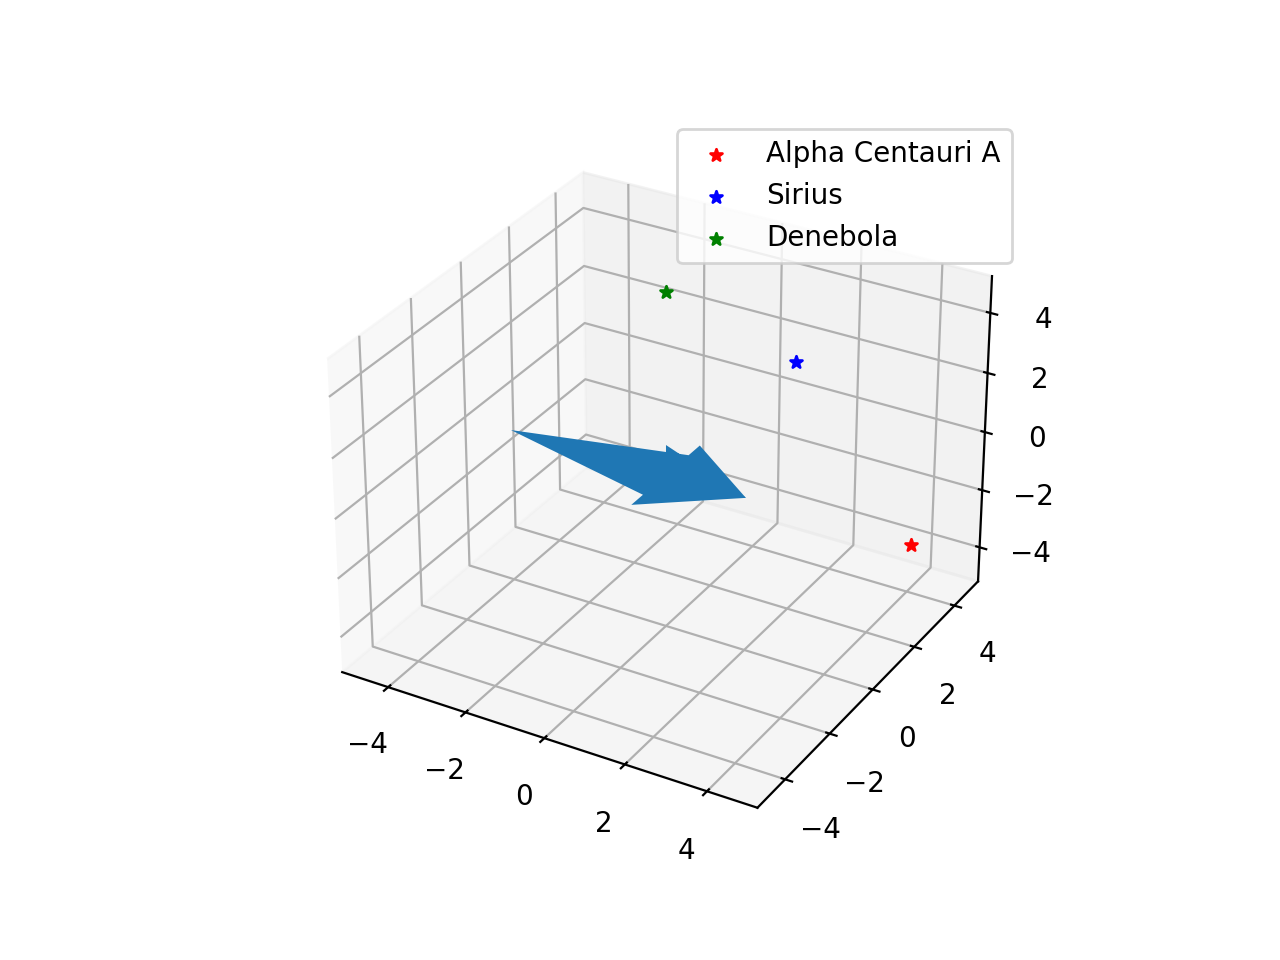

'MISSION SUCCESSFUL!!! You are on the right trajectory.'

In [122]:
%matplotlib notebook

from Assignment_06_Frames_files.data.simulation import Simulation

sim = Simulation('Assignment_06_Frames_files/data/ini_pos.txt', 'Assignment_06_Frames_files/data/fin_pos.txt')

sim.euler_continuous(np.rad2deg(alpha), np.rad2deg(beta), np.rad2deg(gamma))

# Task 4

**[15 Point(s)]**

## Rotation Matrices [15 points]


You are given a set of matrices and your task is to find out whether the matrices represent rotations.

In [124]:
import numpy as np
from Assignment_06_Frames_files.data.matrix_samples import samples

def is_rotation_matrix(matrix: np.ndarray) -> bool:
    '''Returns True only if the input matrix is a
    rotation matrix, otherwise it returns False.

    Keyword arguments:
    matrix -- np.ndarray -- candidate rotation matrix

    '''
    # YOUR CODE HERE
    if matrix.shape[0] != matrix.shape[1]:
        return False

    if not np.allclose(matrix @ matrix.T, np.identity(matrix.shape[0])):
        return False

    if abs(np.linalg.det(matrix)) != 1.0:
        return False

    return True

    #raise NotImplementedError()
    
    
# This cell runs your function with multiple test matrices
# matrix_indices = [idx for idx, mat in enumerate(data.matrix_samples.samples)
#                  if is_rotation_matrix(np.array(mat))]    

matrix_indices = [idx for idx, mat in enumerate(samples)
                  if is_rotation_matrix(np.array(mat))]    


In [125]:
# This cell contains automated tests for your solution
